In [91]:
#Gradient Descent
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
def GD(objective, gradient, initialPoint, stepsize, maxIter, burnin = 1000, wait = 1000, 
       seed = None,
       verbose = True):
    '''
    Perform stochastic gradient descent to maximize objective.
    
    Args:
    objective    - function handle, return objective
    gradient     - function handle, return gradient
    initialPoint - array of dimension d, starting point
    stepsize     - numeric, 
    burnin       - numeric, burnin period
    wait         - numeric, waiting period
    maxIter      - integer, the iterations
    seed         - integer, seed
    verbose      - boolean, whether to print intermediate results
    
    Returns:
    trajectory   - 2d array of (maxIter - burnin)/wait * d, the record of x
    '''
    if isinstance(initialPoint, float):
        d = 1
    else:
        d = len(initialPoint)
    rng = random.Random()
    if seed is not None:
        rng.seed(seed)
    trajectory = np.zeros(((maxIter - burnin)//wait, d))
    x          = initialPoint
    trajectory[0] = x
    ind = 0
    for iter in range(1, maxIter):
        noise = rng.normalvariate(0, np.sqrt(stepsize*2))
        x = x + stepsize * gradient(x) + noise
        if iter >= burnin and (iter - burnin) % wait == 0:
            trajectory[ind] = x
            ind += 1
    return trajectory

In [ ]:
def ProofOfConcept():
    '''
    Show SGD's stationary point can indeed approximate the objective function
    
    '''
    degree = 4
    def func(x):
        return -np.power(x, degree)
    def grad(x):
        return -degree * np.power(x, degree - 1)
    trajectory = GD(func, grad, initialPoint=1., stepsize=0.005, maxIter=int(1e8))
    #plt.figure()
    #plt.plot(trajectory[0:haltIter], image[0:haltIter])
    #plt.figure()
    #plt.hist(trajectory[haltIter/2:haltIter], 100)
    #plt.figure()
    #x = np.arange(-2, 2, 1e-3)
    #plt.plot(x, np.exp(func(x)))
    MyPlot(trajectory[0:int(1e3)], func)
    MyPlot(trajectory[0:int(1e4)], func)
    MyPlot(trajectory[0:int(1e5)], func)
ProofOfConcept()

In [100]:
import matplotlib
from matplotlib.ticker import FuncFormatter
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
formatter = FuncFormatter(to_percent)
def MyPlot(trajectory, func, burnin = 1, wait = 1, binwidth = 1e-2):
    n = len(trajectory)
    x1, y1 = sample2cdf(trajectory[np.arange(burnin, n, wait)])
    x = np.arange(min(x1), max(x1), binwidth)
    plt.plot(x, density2cdf(np.exp(func(x))), 'r', x1, y1)
    plt.figure()
    weights = np.ones_like(x1)/len(x1)
    plt.hist(x1, normed=False, weights=weights, bins=np.arange(min(x1), max(x1), binwidth), color='c', histtype='stepfilled', alpha = 0.5)
    plt.plot(x, np.exp(func(x)) / np.sum(np.exp(func(x))), color = 'b', linewidth = 2.0)
    # Set the formatter
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.show()

Did not converge while max iteration reached 99999999


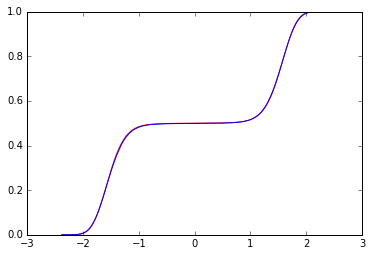

In [49]:
def ProofOfConcept2():
    '''
    Show SGD's stationary point can indeed approximate the objective function
    
    '''
    c = 1
    def func(x):
        return -(x ** 2 - 4)*(x ** 2 - 1) * c
    def grad(x):
        return (-4 * x ** 3 + 10 * x) * c
    trajectory, image, haltIter = GD(func, grad, initialPoint=1., stepsize=0.005, 
                                     noiseLevel=np.sqrt(.01), maxIter=int(1e8), desiredObj=100)
    #plt.figure()
    #plt.plot(trajectory[0:haltIter], image[0:haltIter])
    x1, y1 = sample2cdf(trajectory[np.arange(haltIter//1000, haltIter, 100)])
    x = np.arange(min(x1), max(x1), 1e-3)
    plt.plot(x, density2cdf(np.exp(func(x))), 'r', x1, y1)

ProofOfConcept2()

In [13]:
def density2cdf(density):
    '''
    Transform a density to a cdf
    '''
    tmp = np.cumsum(density)
    return tmp/tmp[-1]

In [23]:
def sample2cdf(samples, nbins = 1000):
    '''
    Transform a sample set to a cdf
    '''
    mysorted = np.sort(samples, axis = None)
    n = len(samples)
    return(mysorted, np.linspace(1.0/n, 1, n ))
    

Did not converge while max iteration reached 999999


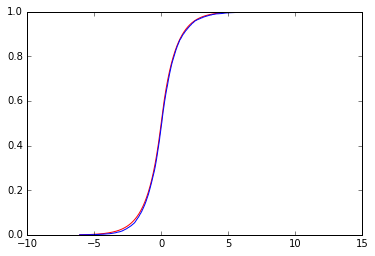

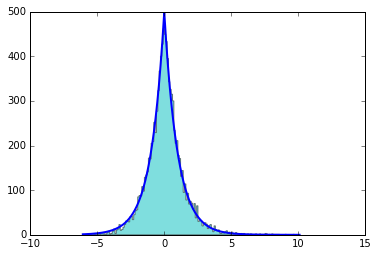

In [67]:
def GD_UnitTest(order = 1):
    '''
    Unit test for GD for polynomial functions
    '''
    def func(x):
        return -np.power(np.abs(x), order)
    def grad(x):
        return -order * np.sign(x) * np.power(abs(x), order - 1)
    trajectory, image, haltIter = GD(func, grad, initialPoint=1e-3, stepsize=1e-2/2, 
                                     noiseLevel=1e-1, maxIter=int(1e6), desiredObj=1000)
    x1, y1 = sample2cdf(trajectory[np.arange(haltIter//1000, haltIter, 100)])
    x = np.arange(min(x1), max(x1), 1e-3)
    #print(min(x1), max(x1))
    plt.plot(x, density2cdf(np.exp(func(x))), 'r', x1, y1)
    plt.show()
    plt.figure()
    binwidth = .1
    plt.hist(x1, normed=False, bins=np.arange(min(x1), max(x1), binwidth), color='c', histtype='stepfilled', alpha = 0.5)
    plt.plot(x, np.exp(func(x)) * binwidth * len(x1)/2, color = 'b', linewidth = 2.0)
    plt.show()
GD_UnitTest(order = 1)